In [1]:
import pandas as pd

In [2]:
#!wget https://cernbox.cern.ch/index.php/s/BNyyLOAbtcLjrUM/download -O /opt/workspace/data-1.pkl
#!ls  /opt/workspace/

In [3]:

df = pd.read_pickle('/opt/workspace/data-1.pkl')

In [394]:
df.describe()

,count,sum(b_block_size),count_annual
count,392514.000000,3.925140e+05,392514.000000
mean,543.886873,7.663958e+12,45.542562
std,1408.486842,3.256199e+13,119.115269
min,1.000000,4.247900e+04,1.000000
25%,14.000000,2.076295e+10,2.000000
50%,83.000000,1.795622e+11,11.000000
75%,501.000000,2.082420e+12,37.000000
max,101688.000000,7.163531e+14,683.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392514 entries, 0 to 392513
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   DESIRED_CMSDataset  392514 non-null  object        
 1   CRAB_UserHN         392514 non-null  object        
 2   Workflow            392514 non-null  object        
 3   CMSSWMajorVersion   392514 non-null  object        
 4   CMSSWReleaseSeries  392514 non-null  object        
 5   count               392514 non-null  int64         
 6   date                392514 non-null  datetime64[ns]
 7   DATA_TIER           392514 non-null  object        
 8   sum(b_block_size)   392514 non-null  float64       
 9   count_annual        392514 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 29.9+ MB


In [6]:
df.head()

,DESIRED_CMSDataset,CRAB_UserHN,Workflow,CMSSWMajorVersion,CMSSWReleaseSeries,count,date,DATA_TIER,sum(b_block_size),count_annual
0,/ADDGravToGG_MS-10000_NED-2_KK-1_M-500To1000_1...,jmsilva,jmsilva_crab_SPRACE-BR-tests-1645710214-Analys...,10_X_X,10_6_X,1,2022-02-24,NANOAODSIM,1.554195e+08,1
1,/ADDGravToGG_MS-10000_NED-4_KK-1_M-4000To10000...,jmsilva,jmsilva_crab_SPRACE-BR-tests-1645710214-Analys...,10_X_X,10_6_X,1,2022-02-24,NANOAODSIM,1.318719e+08,1
2,/ADDGravToGG_MS-11000_NED-2_KK-1_M-4000To11000...,jmsilva,jmsilva_crab_SPRACE-BR-tests-1645710214-Analys...,10_X_X,10_6_X,1,2022-02-24,NANOAODSIM,1.854560e+08,1
3,/ADDGravToGG_MS-11000_NED-4_KK-1_M-1000To2000_...,jmsilva,jmsilva_crab_SPRACE-BR-tests-1645710214-Analys...,10_X_X,10_6_X,1,2022-02-24,NANOAODSIM,1.648174e+08,1
4,/ADDGravToGG_MS-3500_NED-2_KK-4_M-500To1000_13...,jmsilva,jmsilva_crab_SPRACE-BR-tests-1597262036-Analys...,10_X_X,10_6_X,1,2020-08-12,MINIAODSIM,3.741207e+09,1


In [7]:
df[df['DESIRED_CMSDataset'].str.count('^.*/HC.*')>0].count()

DESIRED_CMSDataset    14726
CRAB_UserHN           14726
Workflow              14726
CMSSWMajorVersion     14726
CMSSWReleaseSeries    14726
count                 14726
date                  14726
DATA_TIER             14726
sum(b_block_size)     14726
count_annual          14726
dtype: int64

In [8]:
df_noHC = df[df['DESIRED_CMSDataset'].str.count('^.*/HC.*')==0]

In [7]:
df_noHC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377788 entries, 0 to 392513
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   DESIRED_CMSDataset  377788 non-null  object        
 1   CRAB_UserHN         377788 non-null  object        
 2   Workflow            377788 non-null  object        
 3   CMSSWMajorVersion   377788 non-null  object        
 4   CMSSWReleaseSeries  377788 non-null  object        
 5   count               377788 non-null  int64         
 6   date                377788 non-null  datetime64[ns]
 7   DATA_TIER           377788 non-null  object        
 8   sum(b_block_size)   377788 non-null  float64       
 9   count_annual        377788 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 31.7+ MB


In [137]:
#!pip3 install seaborn

In [138]:

import seaborn as snb


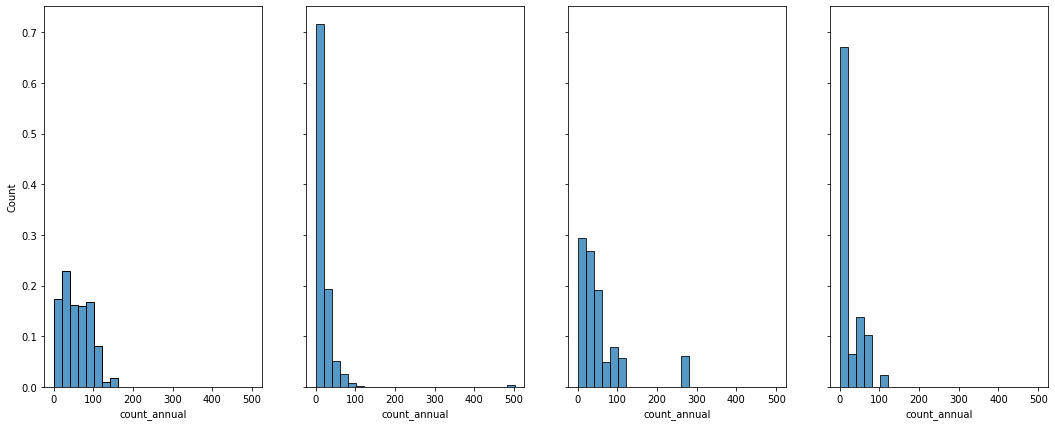

In [136]:
import matplotlib.pyplot as plt
import numpy as np

f, axs = plt.subplots(1,4,
                      figsize=(18,7),
                      sharey=True,
                      sharex=True)

i = 0

for tier in ['MINIAOD', 'MINIAODSIM', 'AOD', 'AODSIM']:
    df_tmp = df_noHC[df_noHC['DATA_TIER']==tier]['count_annual']
        
    weights = [1./len(df_tmp) for _ in df_tmp ]
    
    snb.histplot(
        x=df_tmp,
        weights=weights,
        kde=False,
        bins=10,
        binwidth=20,
        ax=axs[i]
    )

    i += 1

    #df_tmp.groupby(['count_annual'])['count_annual'].max().plot.hist()



# STUDY FREQUENCIES

In [223]:
df_first = df_noHC[df_noHC['DATA_TIER'].isin(['MINIAOD','MINIAODSIM','AOD','AODSIM'])].drop_duplicates(subset="DESIRED_CMSDataset", keep="first").reset_index()[['date', 'DESIRED_CMSDataset','count_annual','sum(b_block_size)']]

In [224]:
df_last = df_noHC[df_noHC['DATA_TIER'].isin(['MINIAOD','MINIAODSIM','AOD','AODSIM'])].drop_duplicates(subset="DESIRED_CMSDataset", keep="last").reset_index()[['date', 'DESIRED_CMSDataset','count_annual','sum(b_block_size)']]

In [225]:
df_diff = df_first.merge(df_last, on='DESIRED_CMSDataset', suffixes=['_first', '_last'])

In [226]:
df_diff

,date_first,DESIRED_CMSDataset,count_annual_first,sum(b_block_size)_first,date_last,count_annual_last,sum(b_block_size)_last
0,2020-08-12,/ADDGravToGG_MS-3500_NED-2_KK-4_M-500To1000_13...,1,3.741207e+09,2020-08-12,1,3.741207e+09
1,2020-08-12,/ADDGravToGG_MS-4000_NED-2_KK-4_M-2000To4000_1...,1,4.312377e+09,2020-08-12,1,4.312377e+09
2,2020-08-12,/ADDGravToGG_MS-4500_NED-4_KK-1_M-500To1000_13...,1,3.768355e+09,2020-08-12,1,3.768355e+09
3,2020-08-12,/ADDGravToGG_MS-5000_NED-4_KK-1_M-2000To3000_1...,2,4.091368e+09,2020-11-18,2,4.091368e+09
4,2020-08-12,/ADDGravToGG_MS-5500_NED-4_KK-1_M-2000To4000_1...,1,4.225427e+09,2020-08-12,1,4.225427e+09
...,...,...,...,...,...,...,...
33870,2020-07-06,/ttbb_4FS_OpenLoops_13TeV-sherpa/RunIISummer16...,2,9.016573e+11,2022-03-29,2,9.016573e+11
33871,2022-03-29,/ttbb_4FS_ckm_NNPDF31_TuneCP5_amcatnlo_madspin...,1,7.182179e+11,2022-03-29,1,7.182179e+11
33872,2020-10-23,/ttbb_4FS_ckm_NNPDF31_TuneCP5_amcatnlo_madspin...,1,3.578642e+11,2020-10-23,1,3.578642e+11
33873,2020-07-28,/ttbb_4FS_ckm_NNPDF31_TuneCP5_amcatnlo_madspin...,3,3.625666e+11,2021-02-25,3,3.625666e+11


<AxesSubplot:ylabel='Frequency'>

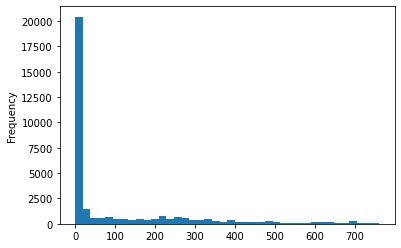

In [227]:
(df_diff['date_last'] - df_diff['date_first']).dt.days.plot.hist(bins=40)

In [228]:
df_diff['date_diff'] = (df_diff['date_last'] - df_diff['date_first']).dt.days.to_frame()
df_diff['bins'] = pd.cut(df_diff['date_diff'],bins=[-1,30,180,800], labels=["0-30","30-180","180+"])
df_diff['freq'] = pd.cut(df_diff['count_annual_last'],bins=[-1,2,5,800], labels=["0-2","2-5","5+"])


In [229]:
df_diff

,date_first,DESIRED_CMSDataset,count_annual_first,sum(b_block_size)_first,date_last,count_annual_last,sum(b_block_size)_last,date_diff,bins,freq
0,2020-08-12,/ADDGravToGG_MS-3500_NED-2_KK-4_M-500To1000_13...,1,3.741207e+09,2020-08-12,1,3.741207e+09,0,0-30,0-2
1,2020-08-12,/ADDGravToGG_MS-4000_NED-2_KK-4_M-2000To4000_1...,1,4.312377e+09,2020-08-12,1,4.312377e+09,0,0-30,0-2
2,2020-08-12,/ADDGravToGG_MS-4500_NED-4_KK-1_M-500To1000_13...,1,3.768355e+09,2020-08-12,1,3.768355e+09,0,0-30,0-2
3,2020-08-12,/ADDGravToGG_MS-5000_NED-4_KK-1_M-2000To3000_1...,2,4.091368e+09,2020-11-18,2,4.091368e+09,98,30-180,0-2
4,2020-08-12,/ADDGravToGG_MS-5500_NED-4_KK-1_M-2000To4000_1...,1,4.225427e+09,2020-08-12,1,4.225427e+09,0,0-30,0-2
...,...,...,...,...,...,...,...,...,...,...
33870,2020-07-06,/ttbb_4FS_OpenLoops_13TeV-sherpa/RunIISummer16...,2,9.016573e+11,2022-03-29,2,9.016573e+11,631,180+,0-2
33871,2022-03-29,/ttbb_4FS_ckm_NNPDF31_TuneCP5_amcatnlo_madspin...,1,7.182179e+11,2022-03-29,1,7.182179e+11,0,0-30,0-2
33872,2020-10-23,/ttbb_4FS_ckm_NNPDF31_TuneCP5_amcatnlo_madspin...,1,3.578642e+11,2020-10-23,1,3.578642e+11,0,0-30,0-2
33873,2020-07-28,/ttbb_4FS_ckm_NNPDF31_TuneCP5_amcatnlo_madspin...,3,3.625666e+11,2021-02-25,3,3.625666e+11,212,180+,2-5


array([<AxesSubplot:ylabel='0-2'>, <AxesSubplot:ylabel='2-5'>,
       <AxesSubplot:ylabel='5+'>], dtype=object)

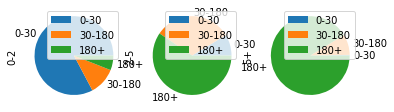

In [230]:
# Number of ds in that certain lifetime range by number of daily access
df_diff.groupby(['freq','bins'])['date_diff'].count().unstack(level=0).plot.pie(subplots=True)

array([<AxesSubplot:ylabel='0-2'>, <AxesSubplot:ylabel='2-5'>,
       <AxesSubplot:ylabel='5+'>], dtype=object)

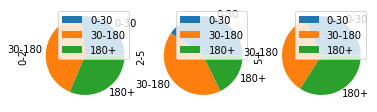

In [241]:
# mean size of the datasets by lifetime range and by number of daily access range
df_diff_unique = df_diff.drop_duplicates(subset=["DESIRED_CMSDataset",'freq','bins'])
df_diff_unique.groupby(['freq','bins'])['sum(b_block_size)_last'].mean().unstack(level=0).plot.pie(subplots=True)

In [237]:
df_diff_unique.groupby(['freq','bins'])['sum(b_block_size)_last'].mean()

freq  bins  
0-2   0-30      5.620212e+11
      30-180    8.826511e+11
      180+      6.583990e+11
2-5   0-30      2.601973e+12
      30-180    2.699707e+12
      180+      1.148684e+12
5+    0-30      3.853531e+12
      30-180    4.145558e+12
      180+      4.134903e+12
Name: sum(b_block_size)_last, dtype: float64

# Rolling and annual counts

In [388]:
#df_rolling = df_noHC[df_noHC['DATA_TIER'].isin(['MINIAOD','MINIAODSIM','AOD','AODSIM'])]\
#df_rolling = df_noHC[df_noHC['DATA_TIER'].isin(['MINIAOD','MINIAODSIM'])]\
df_rolling = df_noHC\
    .reset_index()[['date', 'DESIRED_CMSDataset', 'DATA_TIER','count_annual','sum(b_block_size)']].set_index('date').sort_index()


<AxesSubplot:xlabel='date'>

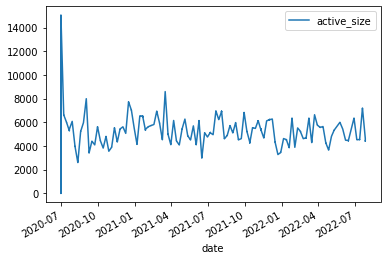

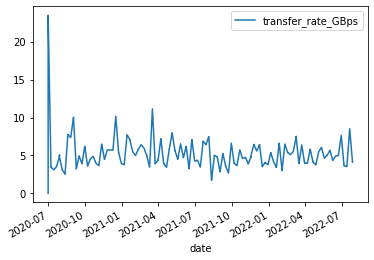

In [393]:
from datetime import date, timedelta


previous = None

data = [0 for _ in range(780)]
new_data = [0 for _ in range(780)]
date_ = [date(2020,7,1) for _ in range(780)]

for i in range(7):
    j = 0
    for date_grp, d in df_rolling.shift(i).resample('7d'):
        date_[i+(j*7)] = date_grp
        data[i+(j*7)] = d.drop_duplicates(subset='DESIRED_CMSDataset')['sum(b_block_size)'].sum()/1e12
        #print(d.drop_duplicates(subset='DESIRED_CMSDataset')['sum(b_block_size)'].sum()/1e12)
        if previous:
            new_data[i+(j*7)] = (d[~d['DESIRED_CMSDataset'].isin(previous)].drop_duplicates(subset='DESIRED_CMSDataset')['sum(b_block_size)'].sum()/1e9/3600/24/7)
        previous = d.drop_duplicates(subset='DESIRED_CMSDataset')['DESIRED_CMSDataset'].to_list()
        #print('---')
        j += 1


df_dict = {'date': date_, "active_size": data}
pd.DataFrame(df_dict).set_index('date').sort_index().plot()

df_dict = {'date': date_, "transfer_rate_GBps": new_data}
pd.DataFrame(df_dict).set_index('date').sort_index().plot()


In [8]:
df_noHC['count_annual'].describe()

count    377788.000000
mean         24.503888
std          38.353838
min           1.000000
25%           2.000000
50%          10.000000
75%          32.000000
max         485.000000
Name: count_annual, dtype: float64

In [33]:
# TODO: check this anomaly!!!!
df_noHC[df_noHC['count_annual']==485]

,DESIRED_CMSDataset,CRAB_UserHN,Workflow,CMSSWMajorVersion,CMSSWReleaseSeries,count,date,DATA_TIER,sum(b_block_size),count_annual
351904,/WplusToENu_CT10_13TeV-powheg-pythia8/Spring14...,jihwan,jihwan_crab_20200709_164535,7_X_X,7_2_X,1698,2020-07-09,MINIAODSIM,1.334122e+11,485
351905,/WplusToENu_CT10_13TeV-powheg-pythia8/Spring14...,jihwan,jihwan_crab_20200710_134458,7_X_X,7_2_X,1698,2020-07-10,MINIAODSIM,1.334122e+11,485
351906,/WplusToENu_CT10_13TeV-powheg-pythia8/Spring14...,jihwan,jihwan_crab_20200710_103927,7_X_X,7_2_X,1698,2020-07-10,MINIAODSIM,1.334122e+11,485
351907,/WplusToENu_CT10_13TeV-powheg-pythia8/Spring14...,jihwan,jihwan_crab_20200713_104347,7_X_X,7_2_X,1698,2020-07-13,MINIAODSIM,1.334122e+11,485
351908,/WplusToENu_CT10_13TeV-powheg-pythia8/Spring14...,jihwan,jihwan_crab_20200713_171553,7_X_X,7_2_X,1698,2020-07-13,MINIAODSIM,1.334122e+11,485
...,...,...,...,...,...,...,...,...,...,...
352465,/WplusToENu_CT10_13TeV-powheg-pythia8/Spring14...,jihwan,jihwan_crab_20220726_114122,7_X_X,7_2_X,102,2022-07-26,MINIAODSIM,1.334122e+11,485
352466,/WplusToENu_CT10_13TeV-powheg-pythia8/Spring14...,jihwan,jihwan_crab_20220727_102952,7_X_X,7_2_X,102,2022-07-27,MINIAODSIM,1.334122e+11,485
352467,/WplusToENu_CT10_13TeV-powheg-pythia8/Spring14...,jihwan,jihwan_crab_20220728_103151,7_X_X,7_2_X,102,2022-07-28,MINIAODSIM,1.334122e+11,485
352468,/WplusToENu_CT10_13TeV-powheg-pythia8/Spring14...,jihwan,jihwan_crab_20220729_105738,7_X_X,7_2_X,110,2022-07-29,MINIAODSIM,1.334122e+11,485


In [71]:
df_rolling = df_noHC[df_noHC['DATA_TIER'].isin(['MINIAOD','MINIAODSIM','AOD','AODSIM'])][df_noHC['count_annual']<2 ].set_index('date').sort_index().rolling('30d').max()


/tmp/ipykernel_1212/2797792511.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_rolling = df_noHC[df_noHC['DATA_TIER'].isin(['MINIAOD','MINIAODSIM','AOD','AODSIM'])][df_noHC['count_annual']<2 ].set_index('date').sort_index().rolling('30d').max()


In [72]:
df_noHC[df_noHC['count_annual']>200].groupby(['DESIRED_CMSDataset', 'CRAB_UserHN']).count()

Workflow  \
DESIRED_CMSDataset                                 CRAB_UserHN             
/HIMinimumBias11/HIRun2018A-04Apr2019-v1/AOD       agu                 6   
                                                   anstahll           26   
                                                   bkorodi             2   
                                                   ddirmait            2   
                                                   jaebeom             2   
                                                   mstojano           12   
                                                   nsaha             466   
                                                   prabhat           150   
                                                   rosingh            12   
                                                   rpradhan           98   
                                                   rxiao               4   
                                                   sayan             322   
                                                   sochandr           14   
                                                   soohwan             8   
                                                   subehera          140   
                                                   vgawas             38   
                                                   wangj              10   
                                                   wxie               44   
/WplusToENu_CT10_13TeV-powheg-pythia8/Spring14m... jihwan            563   
                                                   junghyun            2   
                                                   ycheon              1   

                                                                CMSSWMajorVersion  \
DESIRED_CMSDataset                                 CRAB_UserHN                      
/HIMinimumBias11/HIRun2018A-04Apr2019-v1/AOD       agu                          6   
                                                   anstahll                    26   
                                                   bkorodi                      2   
                                                   ddirmait                     2   
                                                   jaebeom                      2   
                                                   mstojano                    12   
                                                   nsaha                      466   
                                                   prabhat                    150   
                                                   rosingh                     12   
                                                   rpradhan                    98   
                                                   rxiao                        4   
                                                   sayan                      322   
                                                   sochandr                    14   
                                                   soohwan                      8   
                                                   subehera                   140   
                                                   vgawas                      38   
                                                   wangj                       10   
                                                   wxie                        44   
/WplusToENu_CT10_13TeV-powheg-pythia8/Spring14m... jihwan                     563   
                                                   junghyun                     2   
                                                   ycheon                       1   

                                                                CMSSWReleaseSeries  \
DESIRED_CMSDataset                                 CRAB_UserHN                       
/HIMinimumBias11/HIRun2018A-04Apr2019-v1/AOD       agu                           6   
                                                   anstahll                     26   
               

In [73]:
df_rolling.describe()

,count,sum(b_block_size),count_annual
count,22390.000000,2.239000e+04,22390.0
mean,6861.311076,7.215974e+13,1.0
std,3332.203456,7.525764e+13,0.0
min,1.000000,1.148864e+10,1.0
25%,4170.000000,3.000238e+13,1.0
50%,5617.000000,5.987498e+13,1.0
75%,9807.000000,7.911844e+13,1.0
max,14685.000000,4.616482e+14,1.0


<AxesSubplot:xlabel='date'>

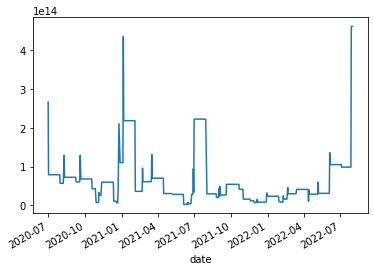

In [74]:
df_rolling.groupby(['date','sum(b_block_size)']).max().reset_index().groupby(['date'])['sum(b_block_size)'].sum().plot()

<AxesSubplot:xlabel='date'>

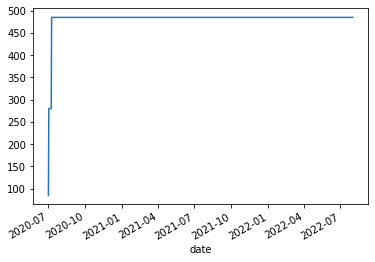

In [19]:
df_rolling.groupby(['date','sum(b_block_size)']).max().reset_index().groupby(['date'])['count_annual'].mean().plot()

<AxesSubplot:xlabel='date'>

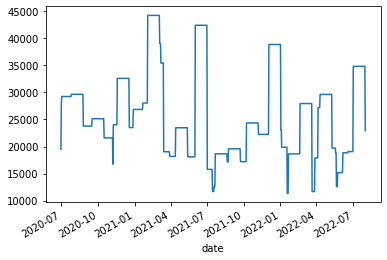

In [21]:
df_rolling.groupby(['date','sum(b_block_size)']).max().reset_index().groupby(['date'])['count'].mean().plot()

<AxesSubplot:xlabel='date'>

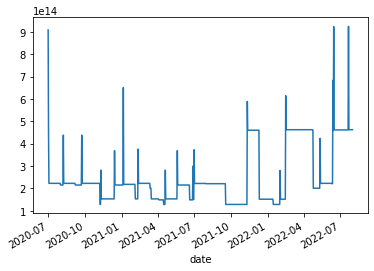

In [67]:
def f(x):
   #print(x)
   return x.drop_duplicates('sum(b_block_size)')['sum(b_block_size)'].sum()
   
df_rolling.reset_index().groupby(['date']).apply(f).plot()

In [80]:
today = df_rolling.reset_index()\
    .drop_duplicates(['date','sum(b_block_size)'])\
    .set_index(['date','sum(b_block_size)'])

tomorrow =  df_rolling.shift(-30).dropna(subset='sum(b_block_size)').reset_index()\
    .drop_duplicates(['date', 'sum(b_block_size)'])\
            .set_index(['date','sum(b_block_size)'])

In [81]:
df_rolling[df_rolling.index == '2020-07-01'].reset_index().drop_duplicates(['date', 'sum(b_block_size)'])

,date,count,sum(b_block_size),count_annual
0,2020-07-01,1.0,1.933307e+11,1.0
1,2020-07-01,2.0,2.732975e+11,11.0
4,2020-07-01,13.0,4.248058e+12,11.0
7,2020-07-01,25978.0,1.723100e+13,12.0
17,2020-07-01,25978.0,2.541736e+13,12.0
36,2020-07-01,25978.0,6.207916e+13,19.0
170,2020-07-01,25978.0,6.603492e+13,39.0
171,2020-07-01,25978.0,6.603678e+13,39.0
1188,2020-07-01,25978.0,1.491189e+14,113.0
1189,2020-07-01,25978.0,1.491276e+14,113.0


In [85]:
migration_check = today.join(tomorrow, rsuffix='_yesterday', how='right')

In [86]:
import datetime
migration_check[migration_check.index == '2020-07-02'].info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 0 entries
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   count                   0 non-null      float64
 1   count_annual            0 non-null      float64
 2   count_yesterday         0 non-null      float64
 3   count_annual_yesterday  0 non-null      float64
dtypes: float64(4)
memory usage: 22.9 KB


In [87]:
migration_check.head(20)

count  count_annual  count_yesterday  \
date       sum(b_block_size)                                           
2020-07-01 2.541736e+13       25978.0          12.0          25978.0   
           6.207916e+13       25978.0          19.0          25978.0   
           6.603492e+13       25978.0          39.0          25978.0   
           6.603678e+13       25978.0          39.0          25978.0   
           1.491189e+14       25978.0         113.0          25978.0   
           1.491276e+14       25978.0         113.0          25978.0   
           1.534376e+14       25978.0         113.0          25978.0   
           2.154903e+14       25978.0         280.0          25978.0   
2020-07-02 2.154903e+14       25978.0         280.0          25978.0   
           2.229348e+14       25978.0         280.0          25978.0   
2020-07-03 2.229348e+14       29253.0         280.0          29253.0   
2020-07-04 2.229348e+14       29253.0         280.0          29253.0   
2020-07-05 2.229348e+14       29253.0         280.0          29253.0   
2020-07-06 2.229348e+14       29253.0         280.0          29253.0   
2020-07-07 2.229348e+14       29253.0         280.0          29253.0   
2020-07-08 2.229348e+14       29253.0         280.0          29253.0   
2020-07-09 2.229348e+14       29253.0         280.0          29253.0   
2020-07-10 2.229348e+14       29253.0         485.0          29253.0   
2020-07-11 2.229348e+14       29253.0         485.0          29253.0   
2020-07-12 2.229348e+14       29253.0         485.0          29253.0   

                              count_annual_yesterday  
date       sum(b_block_size)                          
2020-07-01 2.541736e+13                         19.0  
           6.207916e+13                         19.0  
           6.603492e+13                         39.0  
           6.603678e+13                         39.0  
           1.491189e+14                        113.0  
           1.491276e+14                        113.0  
           1.534376e+14                        113.0  
           2.154903e+14                        280.0  
2020-07-02 2.154903e+14                        280.0  
           2.229348e+14                        280.0  
2020-07-03 2.229348e+14                        280.0  
2020-07-04 2.229348e+14                        280.0  
2020-07-05 2.229348e+14                        280.0  
2020-07-06 2.229348e+14                        280.0  
2020-07-07 2.229348e+14                        280.0  
2020-07-08 2.229348e+14                        280.0  
2020-07-09 2.229348e+14                        280.0  
2020-07-10 2.229348e+14                        485.0  
2020-07-11 2.229348e+14                        485.0  
2020-07-12 2.229348e+14                        485.0

0     2.522403e+13
1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
6              NaN
7              NaN
8              NaN
9              NaN
10             NaN
11             NaN
dtype: float64
12    0.0
13    NaN
dtype: float64
14    0.0
dtype: float64
15    0.0
dtype: float64
16    0.0
dtype: float64
17    0.0
dtype: float64
18    0.0
dtype: float64
19    0.0
dtype: float64
20    0.0
dtype: float64
21    0.0
dtype: float64
22    0.0
dtype: float64
23    0.0
dtype: float64
24    0.0
dtype: float64
25    0.0
dtype: float64
26    0.0
dtype: float64
27    0.0
dtype: float64
28    0.0
dtype: float64
29    0.0
dtype: float64
30    0.0
dtype: float64
31    0.0
dtype: float64
32    0.0
dtype: float64
33    0.0
dtype: float64
34    0.0
dtype: float64
35    0.0
dtype: float64
36    0.0
dtype: float64
37    0.0
dtype: float64
38    0.0
dtype: float64
39    0.0
dtype: float64
40    0.0
dtype: float64
41    0.0
dtype: float64
42    0.0
dtype: float

<AxesSubplot:xlabel='date'>

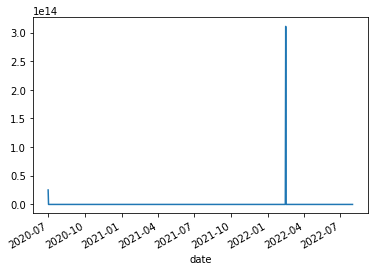

In [77]:
# failing retry with smaller timerange
def f(x):
   #print(x)
   today =  x.drop_duplicates('sum(b_block_size)')['sum(b_block_size)']
   tomorrow =  x.drop_duplicates('sum(b_block_size)_yesterday')['sum(b_block_size)_yesterday']
   print((tomorrow-today))
   return (tomorrow-today).sum()
   
migration_check.reset_index().groupby(['date']).apply(f).plot()